In [9]:
import pandas as pd

df = pd.read_csv("CrimesOnWomenData.csv")
df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [10]:
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [11]:
df=df.fillna(0)

In [13]:
df['Total_Crime'] = df.iloc[:, 2:].sum(axis=1)
df[['Total_Crime']].head()

,Total_Crime
0,31340
1,4362
2,12098
3,12980
4,11930


In [15]:
df['Risk_Level'] = pd.cut(
    df['Total_Crime'],
    bins=[-1, 5000, 15000, 100000],
    labels=[0, 1, 2]
)
df[['Total_Crime', 'Risk_Level']].head()

,Total_Crime,Risk_Level
0,31340,2
1,4362,0
2,12098,1
3,12980,1
4,11930,1


In [17]:
X = df[['Total_Crime']]
y = df['Risk_Level']
X.head()
y.head()

,Risk_Level
0,2
1,0
2,1
3,1
4,1


In [21]:
df['Risk_Level'].isna().sum()

np.int64(2)

In [22]:
df = df.dropna(subset=['Risk_Level'])

In [23]:
X = df[['Total_Crime']]
y = df['Risk_Level']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

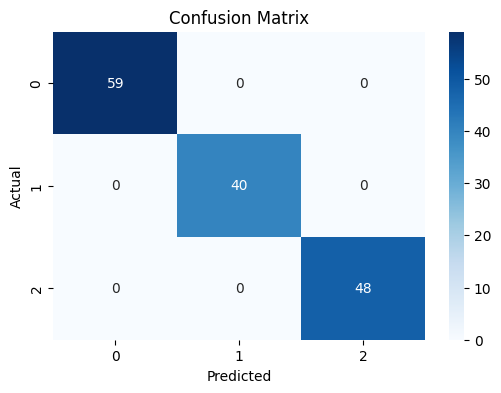

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
import pandas as pd

user_crime_value = pd.DataFrame([[18000]], columns=['Total_Crime'])
prediction = model.predict(user_crime_value)[0]

risk_map = {0: "Low Risk", 1: "Medium Risk", 2: "High Risk"}
print("Predicted Risk Level:", risk_map[prediction])

Predicted Risk Level: High Risk
